# Introduction

In [ ]:
"""
What? mean-shift clustering algorithm

Mean shift clustering using a flat kernel. Mean shift clustering aims to discover “blobs” in a smooth density of 
samples. It is a centroid-based algorithm, which works by updating candidates for centroids to be the mean of 
the points within a given region. These candidates are then filtered in a post-processing stage to eliminate 
near-duplicates to form the final set of centroids.

Reference: https://scikit-learn.org/stable/auto_examples/cluster/plot_mean_shift.html#sphx-glr-auto-examples-cluster-plot-mean-shift-py
           https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html#sklearn.cluster.MeanShift
           https://scikit-learn.org/stable/modules/generated/sklearn.cluster.estimate_bandwidth.html#sklearn.cluster.estimate_bandwidth
           Dorin Comaniciu and Peter Meer, “Mean Shift: A robust approach toward feature space analysis”. IEEE Transactions on Pattern Analysis and Machine Intelligence. 2002. pp. 603-619.
"""

# Import modules

In [7]:
import numpy as np
from matplotlib import rcParams
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from itertools import cycle

# Generate sample data

In [2]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6)

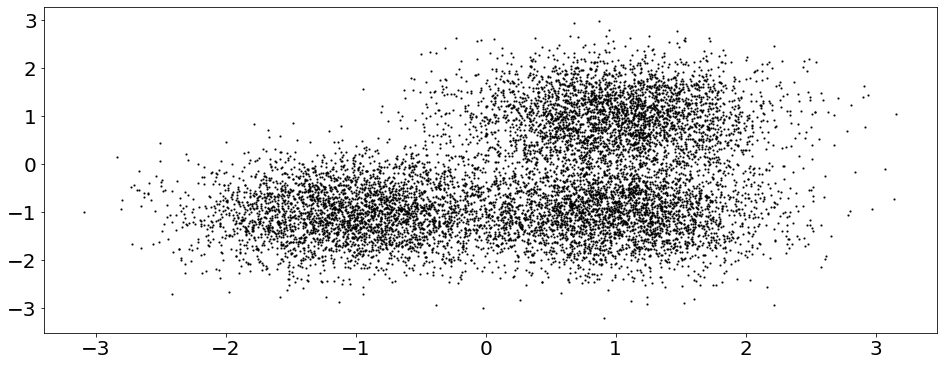

In [15]:
plt.figure()
plt.clf()
rcParams['font.size'] = 20
rcParams['figure.figsize'] = 16, 6
plt.plot(X[:, 0], X[:, 1], 'ks', ms = 1)  
plt.show()

# Compute clustering with MeanShift

In [5]:
# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("No of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 3


# Plot result

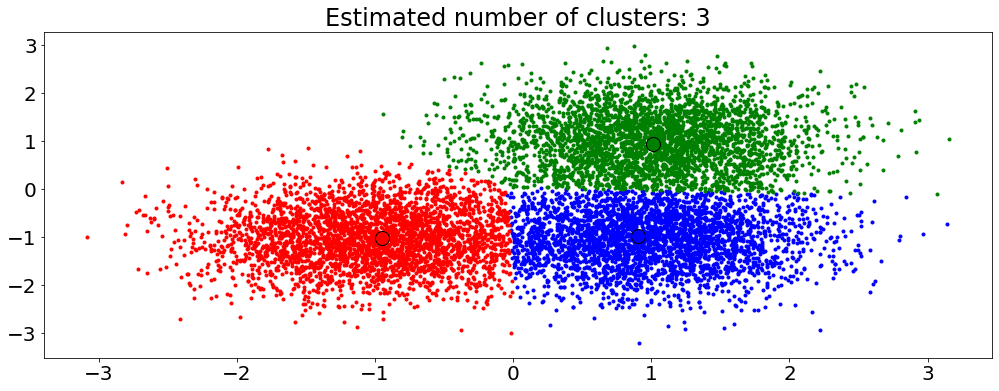

In [10]:
plt.figure()
plt.clf()
rcParams['font.size'] = 20
rcParams['figure.figsize'] = 16, 6

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()